# Feature Engineering for Pharmaceutical Spending Clustering Analysis

## Strategic Feature Selection and Engineering for Market Entry Strategy Development
**Description:**

This notebook implements a two-phase approach: (1) Feature Selection - using correlation analysis to objectively identify which original metrics (PC_HEALTHXP, PC_GDP, USD_CAP, TOTAL_SPEND) should be retained based on redundancy and relevance to the research question, and (2) Feature Engineering - creating growth rates, averages, volatility metrics, and derived ratios from selected features. The process transforms time-series data into country-level characteristics suitable for clustering and market segmentation analysis.

### Step 1 | Load Cleaned Dataset

In [15]:
# Feature Engineering Notebook
# =============================
# Project: Healthcare Expenditure Clustering Analysis
# Purpose: Feature Selection and Engineering for Market Entry Strategy

# Step 1: Import Libraries and Load Cleaned Dataset
# ==================================================

print("="*70)
print("FEATURE ENGINEERING - PHARMACEUTICAL SPENDING CLUSTERING")
print("="*70)

# 1.1 Import necessary libraries
print("\n1.1 Importing Libraries...")

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis
from scipy import stats

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

print("✓ Libraries imported successfully")

FEATURE ENGINEERING - PHARMACEUTICAL SPENDING CLUSTERING

1.1 Importing Libraries...
✓ Libraries imported successfully


In [16]:
# 1.2 Load the cleaned dataset
print("\n1.3 Loading Cleaned Dataset...")

file_path = '../Data/processing/cleaned_data_2011_2020.csv'
df = pd.read_csv(file_path)

print(f"✓ Data loaded successfully from: {file_path}")


1.3 Loading Cleaned Dataset...
✓ Data loaded successfully from: ../Data/processing/cleaned_data_2011_2020.csv


In [17]:
# 1.3 List countries in dataset
print("\n1.6 Countries in Dataset:")
countries = sorted(df['COUNTRY'].unique())
print(f"  Total: {len(countries)} countries\n")
for i in range(0, len(countries), 10):
    print("  " + ", ".join(countries[i:i+10]))

# 1.7 Dataset ready confirmation
print("\n" + "="*70)
print("STEP 1 COMPLETED: Dataset Loaded and Verified")
print("="*70)

print(f"""
Dataset Status:
---------------
✓ Loaded: cleaned_data_2011_2020.csv
✓ Records: {len(df)} rows × {df.shape[1]} columns
✓ Countries: {df['COUNTRY'].nunique()}
✓ Time period: {df['YEAR'].min()}-{df['YEAR'].max()}
✓ Completeness: 100% (no missing values)
✓ Quality: No duplicates

Available Features:
-------------------
1. COUNTRY       - Country identifier (3-letter code)
2. YEAR          - Year (2011-2020)
3. PC_HEALTHXP   - Pharmaceutical spending as % of health expenditure
4. PC_GDP        - Health expenditure as % of GDP
5. USD_CAP       - Health spending per capita (USD)
6. TOTAL_SPEND   - Total health spending (million USD)

Next Step: Feature Selection Analysis (Correlation Matrix)
""")


1.6 Countries in Dataset:
  Total: 36 countries

  AUS, AUT, BEL, CAN, CHE, CRI, CYP, CZE, DEU, DNK
  ESP, EST, FIN, FRA, GRC, HRV, HUN, IRL, ISL, ISR
  ITA, JPN, KOR, LTU, LUX, LVA, MEX, NLD, NOR, POL
  PRT, ROU, SVK, SVN, SWE, USA

STEP 1 COMPLETED: Dataset Loaded and Verified

Dataset Status:
---------------
✓ Loaded: cleaned_data_2011_2020.csv
✓ Records: 360 rows × 6 columns
✓ Countries: 36
✓ Time period: 2011-2020
✓ Completeness: 100% (no missing values)
✓ Quality: No duplicates

Available Features:
-------------------
1. COUNTRY       - Country identifier (3-letter code)
2. YEAR          - Year (2011-2020)
3. PC_HEALTHXP   - Pharmaceutical spending as % of health expenditure
4. PC_GDP        - Health expenditure as % of GDP
5. USD_CAP       - Health spending per capita (USD)
6. TOTAL_SPEND   - Total health spending (million USD)

Next Step: Feature Selection Analysis (Correlation Matrix)



------
### Step 2 | Feature Selection- Correlation Analysis
**Description:**

Calculate and visualize the correlation between the four original features to see if any are redundant.

In [18]:
# Step 2: Correlation Analysis
# ============================

print("\n" + "="*70)
print("STEP 2: CORRELATION ANALYSIS")
print("="*70)

# 2.1 Select the features to analyze
print("\n2.1 Features to Analyze:")

features = ['PC_HEALTHXP', 'PC_GDP', 'USD_CAP', 'TOTAL_SPEND']
print(f"  {features}")

# 2.2 Calculate correlation matrix
print("\n2.2 Correlation Matrix:")

correlation = df[features].corr()
print(correlation.round(3))


STEP 2: CORRELATION ANALYSIS

2.1 Features to Analyze:
  ['PC_HEALTHXP', 'PC_GDP', 'USD_CAP', 'TOTAL_SPEND']

2.2 Correlation Matrix:
             PC_HEALTHXP  PC_GDP  USD_CAP  TOTAL_SPEND
PC_HEALTHXP         1.00    0.71    -0.08        -0.10
PC_GDP              0.71    1.00     0.51         0.35
USD_CAP            -0.08    0.51     1.00         0.70
TOTAL_SPEND        -0.10    0.35     0.70         1.00



2.3 Creating Correlation Heatmap...


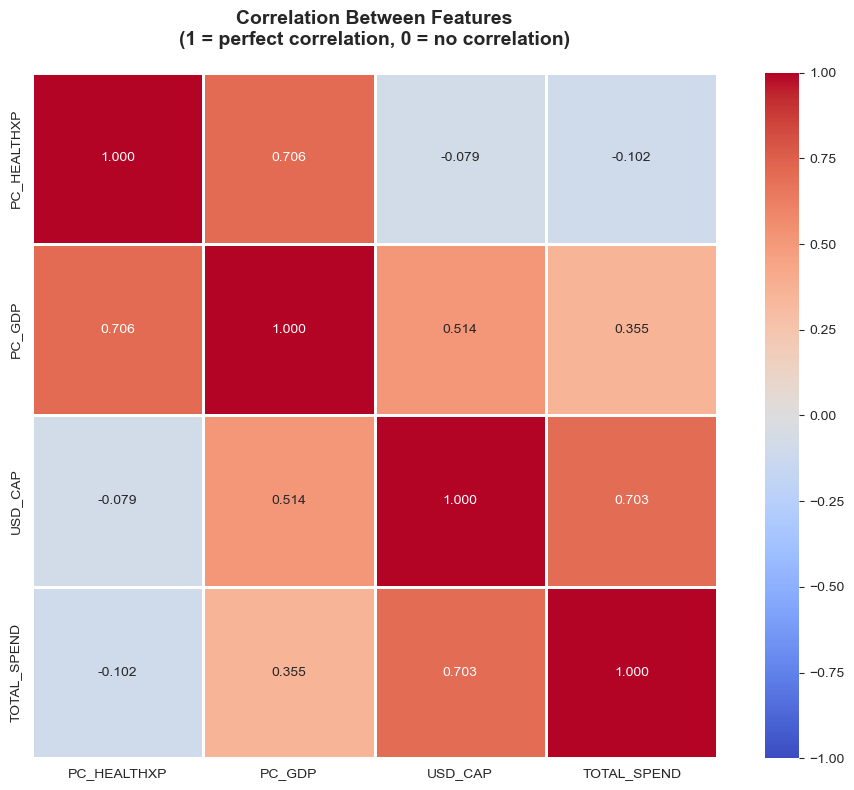


STEP 2 COMPLETED

How to Read the Results:
------------------------
- Values close to 1: Features are very similar (redundant)
- Values close to 0: Features are independent (unique information)
- Values close to -1: Features are opposite

Rule of Thumb:
- Correlation > 0.7: Consider removing one feature (too similar)
- Correlation < 0.7: Keep both features (different enough)



In [23]:
# 2.3 Visualize with heatmap
print("\n2.3 Creating Correlation Heatmap...")

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, 
            annot=True,           # Show numbers
            fmt='.3f',            # 3 decimal places
            cmap='coolwarm',      # Color scheme
            center=0,             # Center colors at 0
            square=True,          # Square cells
            linewidths=2,         # Lines between cells
            vmin=-1, vmax=1)      # Scale from -1 to 1

plt.title('Correlation Between Features\n(1 = perfect correlation, 0 = no correlation)', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("STEP 2 COMPLETED")
print("="*70)

print("""
How to Read the Results:
------------------------
- Values close to 1: Features are very similar (redundant)
- Values close to 0: Features are independent (unique information)
- Values close to -1: Features are opposite

Rule of Thumb:
- Correlation > 0.7: Consider removing one feature (too similar)
- Correlation < 0.7: Keep both features (different enough)
""")

### Correlation Matrix

**Key Findings:**

1. **PC_HEALTHXP ↔ PC_GDP: 0.706 **
   - Strong positive correlation (just above 0.7 threshold)
   - When health spending as % of GDP increases, pharma % also tends to increase
   - Borderline - some overlap but still acceptable

2. **USD_CAP ↔ TOTAL_SPEND: 0.703 **
   - Strong positive correlation (just above 0.7 threshold)
   - Countries with high per capita spending also have high total spending
   - Makes sense: Bigger/richer countries spend more both per person and in total
   - Potential redundancy - these two might provide similar information

3. **Low/Negative Correlations: ✅**
   - PC_HEALTHXP ↔ USD_CAP: -0.079 (nearly independent)
   - PC_HEALTHXP ↔ TOTAL_SPEND: -0.102 (nearly independent)
   - PC_GDP ↔ USD_CAP: 0.514 (moderate, acceptable)
   - PC_GDP ↔ TOTAL_SPEND: 0.355 (weak, acceptable)

**Decision Point:**
The only concerning pair: USD_CAP ↔ TOTAL_SPEND (0.703)

**Question:** Are these two features redundant?

**Options:**
✅ **Drop TOTAL_SPEND (keep USD_CAP)**
- USD_CAP is in our research question explicitly
- USD_CAP is population-adjusted (fairer comparison)
- TOTAL_SPEND is biased by country size

⚠️ **Keep both**
- 0.703 is borderline (not extremely high like 0.9+)
- TOTAL_SPEND adds "market size" information
- But adds complexity

**Recommendation:**
**DROP TOTAL_SPEND, KEEP 3 FEATURES:**
✅ PC_HEALTHXP (essential - in research question)
✅ PC_GDP (essential - in research question)
✅ USD_CAP (essential - in research question)
❌ TOTAL_SPEND (redundant with USD_CAP at 0.703)

**Benefit:** Simpler, focused on research question, eliminates redundancy.

-----

#### Drop TOTAL_SPEND Feature
**Description:**

Based on the correlation analysis showing USD_CAP ↔ TOTAL_SPEND = 0.703, we drop TOTAL_SPEND to eliminate redundancy and focus on the three features explicitly mentioned in the research question.


In [20]:
# Feature Selection Decision - Drop TOTAL_SPEND
# =======================================================

print("\n" + "="*70)
print("FEATURE SELECTION DECISION")
print("="*70)

# Apply Feature Selection
print("\n2B.3 Applying Feature Selection...")

print(f"\nBefore: {df.shape[1]} columns")
print(f"  Columns: {list(df.columns)}")

# Create new dataframe without TOTAL_SPEND
df_selected = df[['COUNTRY', 'YEAR', 'PC_HEALTHXP', 'PC_GDP', 'USD_CAP']].copy()

print(f"\nAfter: {df_selected.shape[1]} columns")
print(f"  Columns: {list(df_selected.columns)}")

print(f"\n✓ TOTAL_SPEND dropped")
print(f"✓ Dataset reduced from {df.shape[1]} to {df_selected.shape[1]} columns")



FEATURE SELECTION DECISION

2B.3 Applying Feature Selection...

Before: 6 columns
  Columns: ['COUNTRY', 'YEAR', 'PC_HEALTHXP', 'PC_GDP', 'USD_CAP', 'TOTAL_SPEND']

After: 5 columns
  Columns: ['COUNTRY', 'YEAR', 'PC_HEALTHXP', 'PC_GDP', 'USD_CAP']

✓ TOTAL_SPEND dropped
✓ Dataset reduced from 6 to 5 columns


In [21]:

# 2B.4 Verify selected dataset
print("\n2B.4 Selected Dataset Verification:")
print(f"  Shape: {df_selected.shape}")
print(f"  Countries: {df_selected['COUNTRY'].nunique()}")
print(f"  Years: {df_selected['YEAR'].min()}-{df_selected['YEAR'].max()}")



2B.4 Selected Dataset Verification:
  Shape: (360, 5)
  Countries: 36
  Years: 2011-2020


### Step 3 | Calculate Growth Rates
**Description:**

Calculate the annual growth rate for each of the 3 selected features (PC_HEALTHXP, PC_GDP, USD_CAP) for each country over the 2011-2020 period.

In [22]:
# Step 3A: Calculate Growth Rates
# ================================

print("\n" + "="*70)
print("STEP 3A: CALCULATE GROWTH RATES")
print("="*70)

# 3A.1 Define selected features
selected_features = ['PC_HEALTHXP', 'PC_GDP', 'USD_CAP']

print("\n3A.1 Features to calculate growth rates for:")
print(f"  {selected_features}")

# 3A.2 Calculate growth rate for each country
print("\n3A.2 Calculating annual growth rates...")

growth_rates = []

for country in df['COUNTRY'].unique():
    # Get data for this country, sorted by year
    country_data = df[df['COUNTRY'] == country].sort_values('YEAR')
    
    # Get first year (2011) and last year (2020)
    first_year = country_data.iloc[0]
    last_year = country_data.iloc[-1]
    
    # Calculate number of years
    years_diff = last_year['YEAR'] - first_year['YEAR']
    
    # Store country name
    country_growth = {'COUNTRY': country}
    
    # Calculate growth for each feature
    for feature in selected_features:
        start_value = first_year[feature]
        end_value = last_year[feature]
        
        # Calculate compound annual growth rate (CAGR)
        if start_value > 0:
            growth_rate = ((end_value / start_value) ** (1 / years_diff) - 1) * 100
        else:
            growth_rate = 0
        
        country_growth[f'{feature}_growth'] = growth_rate
    
    growth_rates.append(country_growth)

# Create dataframe
growth_df = pd.DataFrame(growth_rates)

print(f"✓ Growth rates calculated for {len(growth_df)} countries")

# 3A.3 Display results
print("\n3A.3 Growth Rates Results:")
print(f"\nColumns: {list(growth_df.columns)}")
print(f"\nFirst 10 countries:")
print(growth_df.head(10))

print(f"\nStatistical Summary:")
print(growth_df.describe())

print("\n" + "="*70)
print("STEP 3A COMPLETED: Growth Rates Calculated")
print("="*70)


STEP 3A: CALCULATE GROWTH RATES

3A.1 Features to calculate growth rates for:
  ['PC_HEALTHXP', 'PC_GDP', 'USD_CAP']

3A.2 Calculating annual growth rates...
✓ Growth rates calculated for 36 countries

3A.3 Growth Rates Results:

Columns: ['COUNTRY', 'PC_HEALTHXP_growth', 'PC_GDP_growth', 'USD_CAP_growth']

First 10 countries:
  COUNTRY  PC_HEALTHXP_growth  PC_GDP_growth  USD_CAP_growth
0     AUS               -2.71          -0.25            1.73
1     AUT               -0.15           1.28            3.24
2     BEL               -2.16          -1.32            1.23
3     CAN               -2.51          -0.01            1.15
4     CHE                0.55           2.30            3.90
5     CRI               -6.42          -6.78           -3.04
6     CYP               -1.34           1.63            3.53
7     CZE               -2.74          -0.58            3.22
8     DEU               -0.51           1.31            4.24
9     DNK               -1.78          -1.60            1.42

### What This Step Does:
1. Confirms the 3 selected features
2. Calculates annual growth rates (CAGR) for each feature ✅
3. Calculates decade averages (mean 2011-2020)
4. Calculates volatility (standard deviation)
5. Combines all into one dataset
6. Displays the engineered features